In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("spam-ham.csv", encoding="latin-1")

In [6]:
df.sample(5)

,v1,v2
3578,ham,Multiply the numbers independently and count d...
2309,ham,"I have 2 sleeping bags, 1 blanket and paper an..."
5316,ham,Jus finish watching tv... U?
3706,ham,Aight do you still want to get money
226,spam,Will u meet ur dream partner soon? Is ur caree...


In [7]:
df.shape

(5572, 2)

In [8]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Optimization
#7. Website Interface
#8. Deployment

<span style="font-size: 24px; color: blue; font-weight: bold;">1. Data Cleaning</span>

In [9]:
df.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                     Ok lar
 then Joking wif u oni

2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
# Renaming Column titles
df.rename(columns={'v1':'Type','v2':'text'}, inplace=True)
df.sample(5)

,Type,text
4367,ham,1 I don't have her number and 2 its gonna be a...
4809,ham,"Honey, can you pls find out how much they sell..."
1317,spam,Win the newest ÛÏHarry Potter and the Order o...
4401,ham,Good FRIENDS CaRE for each Other.. CLoSE Frien...
3239,ham,A cute thought for friendship: \Its not necess...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['Type']=encoder.fit_transform(df['Type'])

In [13]:
df.head()

,Type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar then Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking for missing Values
df.isnull().sum()

Type    0
text    0
dtype: int64

In [15]:
# checking for Duplicate values
df.duplicated().sum()

401

In [16]:
#Removing Duplicates
df=df.drop_duplicates(keep='first')

In [17]:
# Rechecking for Duplicate values
df.duplicated().sum()

0

In [18]:
df.shape

(5171, 2)

<span style="font-size: 20px; color: blue; font-weight: bold;">2. Expolaratory Data Analysis</span>

In [19]:
#checking for number of Hams and Spams in dataset
df.head()

,Type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar then Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['Type'].value_counts()

Type
0    4518
1     653
Name: count, dtype: int64

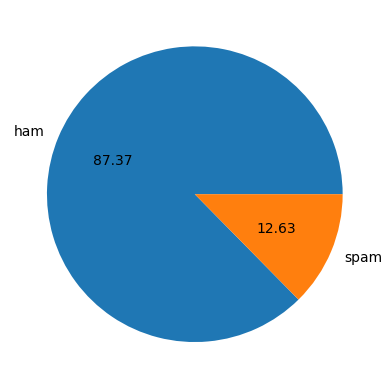

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Type'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [22]:
# Note: data is imbalanced

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Clara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                          Ok lar
 then Joking wif u oni

2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5171, dtype: object

In [27]:
# length in terms of characters
df['text'].apply(len)

0       111
1        30
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5171, dtype: int64

In [30]:
df.loc[:, 'num_characters'] = df['text'].apply(len)

In [31]:
df.head()

,Type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar then Joking wif u oni,30
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# Finding number of words in every email
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                    [Ok, lar, then, Joking, wif, u, oni]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5171, dtype: object

In [33]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        7
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5171, dtype: int64

In [35]:
df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [36]:
df.head()

,Type,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar then Joking wif u oni,30,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
# finding number of sentences
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                         [Ok lar
 then Joking wif u oni]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5171, dtype: object

In [38]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       1
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5171, dtype: int64

In [40]:
df.loc[:, 'num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,Type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar then Joking wif u oni,30,7,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,79.591568,18.606652,1.974280
std,58.591487,13.424824,1.466029
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[df['Type']==0]

,Type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar then Joking wif u oni,30,7,1
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [44]:
#  ham emails
df[df['Type']==0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.131253,17.287074,1.829128
std,56.861084,13.618450,1.404481
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
# Spam emails
df[df['Type']==1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.00000
mean,138.127106,27.736600,2.97856
std,29.910358,6.976813,1.49010
min,13.000000,2.000000,1.00000
25%,132.000000,25.000000,2.00000
50%,149.000000,29.000000,3.00000
75%,157.000000,32.000000,4.00000
max,224.000000,46.000000,9.00000


In [46]:
!pip install seaborn

In [47]:
# plotting Histogram
import seaborn as sns

In [48]:
# first extracting all the ham messages

df[df['Type']==0]['num_characters']

0       111
1        30
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4518, dtype: int64

<Axes: xlabel='num_characters', ylabel='Count'>

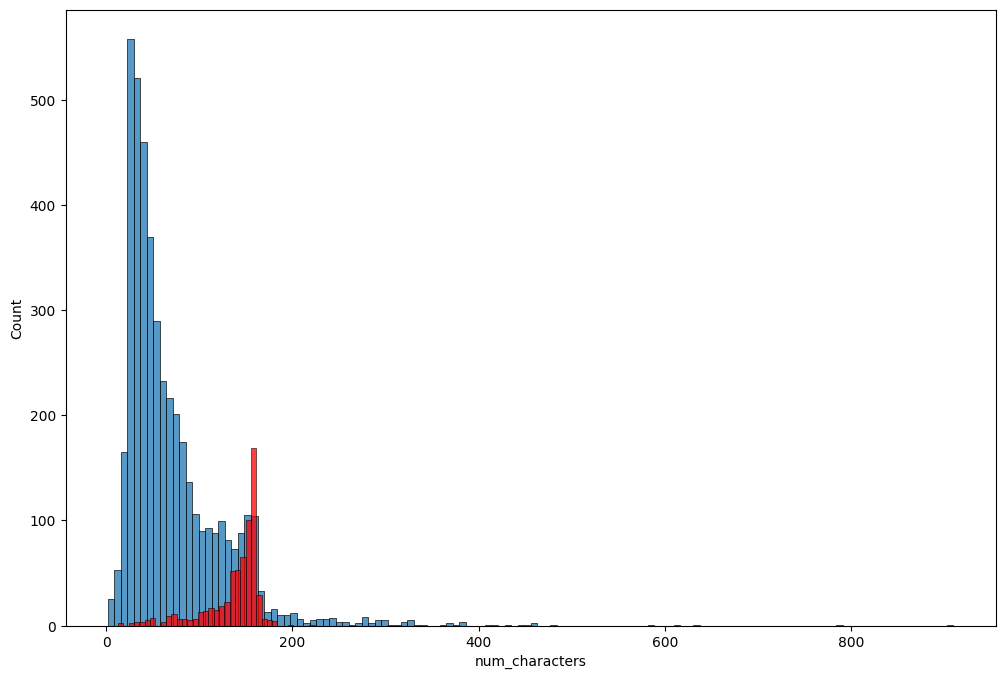

In [49]:
# ham emails
plt.figure(figsize=(12,8))
sns.histplot(df[df['Type']==0]['num_characters'])
sns.histplot(df[df['Type']==1]['num_characters'], color='red')
# spam emails in red

<Axes: xlabel='num_words', ylabel='Count'>

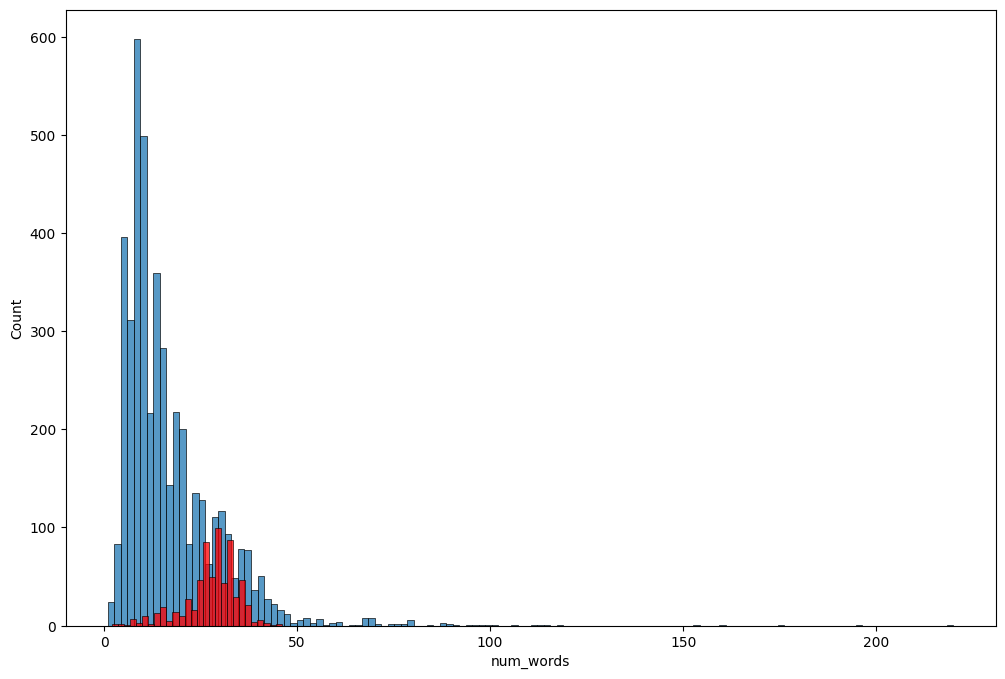

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Type']==0]['num_words'])
sns.histplot(df[df['Type']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

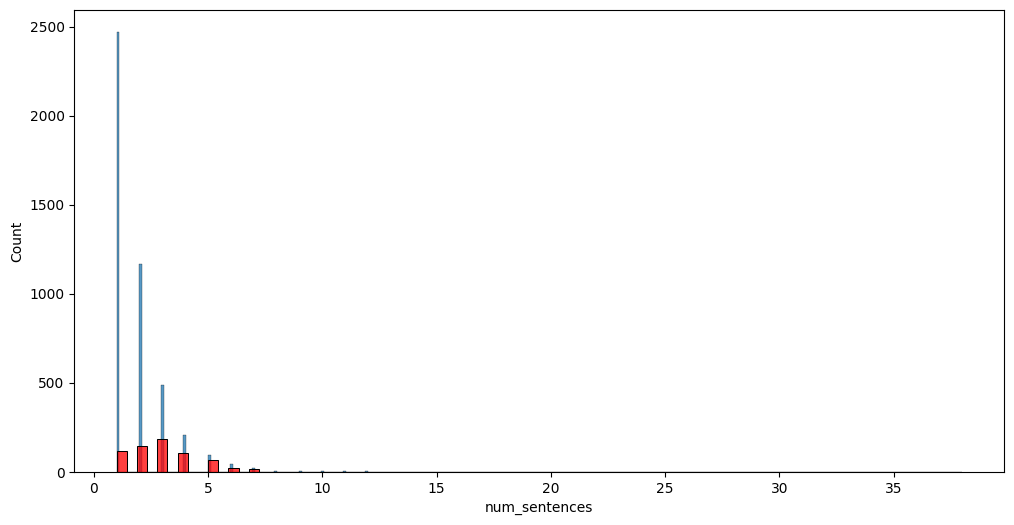

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Type']==0]['num_sentences'])
sns.histplot(df[df['Type']==1]['num_sentences'], color='red')

C:\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


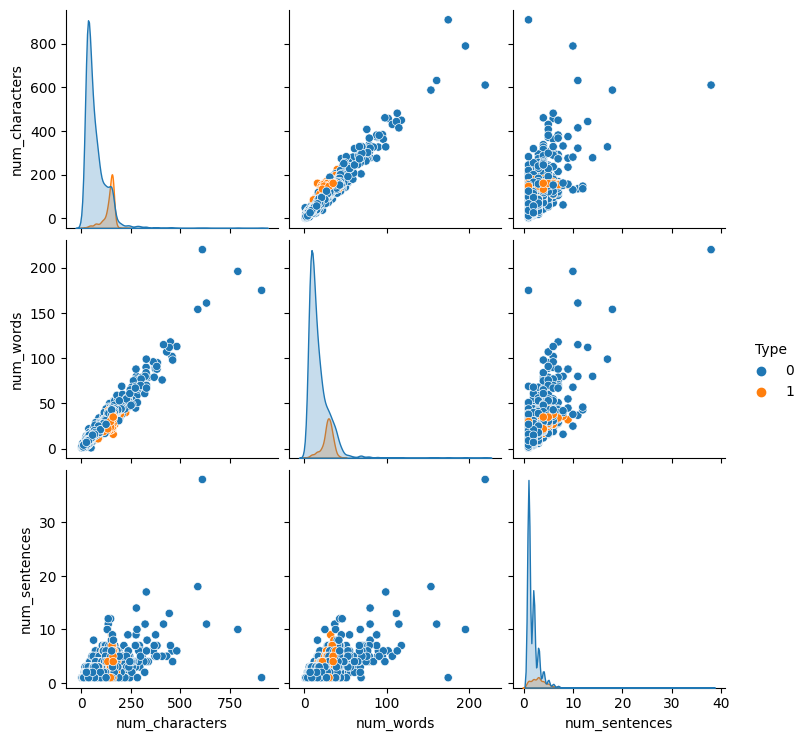

In [52]:
# relation bw num_words and num_sentences and num_characters
sns.pairplot(df,hue='Type')

In [53]:
#Corelation coefficients
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numeric_columns].corr()

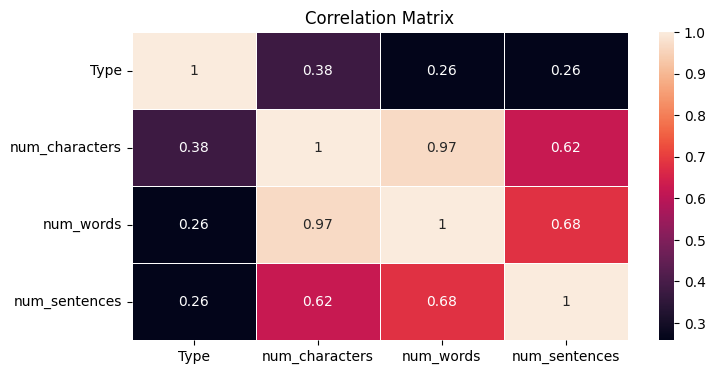

In [54]:
# Generate correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

 <span style="font-size: 24px; color: blue; font-weight: bold;">3. Data PreProcessing</span>
- Lower case
- Tokenizing
- Removing special characters
- Removing Stop words and Punctuation
- Stemming

In [55]:
# LowerCasing
def transform_text(text):
    text=text.lower()
    return text

In [56]:
transform_text('Hi how Are you')

'hi how are you'

In [57]:
# Tokenizing
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    return text

In [58]:
transform_text('Hi how Are You')

['hi', 'how', 'are', 'you']

In [59]:
# Special characters removal
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
        
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [60]:
transform_text('Hi how Are You? Come and get your $$s')

['hi', 'how', 'are', 'you', 'come', 'and', 'get', 'your', 's']

In [61]:
#Removing Stop words and Punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Clara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
        
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
             
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [64]:
transform_text('Hi how Are You? Did you take the Bus?')

['hi', 'take', 'bus']

In [65]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Going')

'go'

In [66]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
        
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
             
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [67]:
transform_text('Hi how Are You? Are taking your pills?')

'hi take pill'

In [68]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [69]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [71]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5171, dtype: object

In [73]:
df.loc[:, 'Transformed_text']=df['text'].apply(transform_text)

In [74]:
df.head()

,Type,text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar then Joking wif u oni,30,7,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [75]:
# Finding Most the used words using WordCloud
# building wordcloud for spam
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [76]:
#get the wordcloud object
wc.generate(df[df['Type']==1]['Transformed_text'].str.cat(sep=" "))

In [77]:
spam_wc = wc.generate(df[df['Type']==1]['Transformed_text'].str.cat(sep=" "))

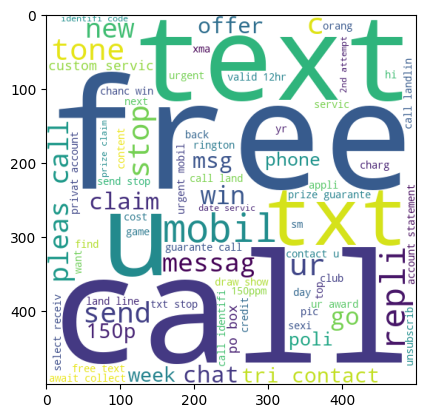

In [78]:
plt.imshow(spam_wc)

In [79]:
# for ham emails
ham_wc = wc.generate(df[df['Type']==0]['Transformed_text'].str.cat(sep=" "))

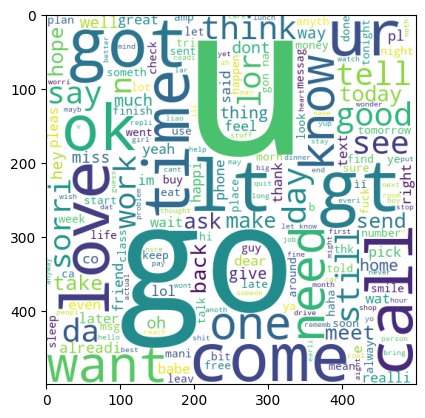

In [80]:
plt.imshow(ham_wc)

In [81]:
df.head()

,Type,text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar then Joking wif u oni,30,7,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [82]:
# how to find top 50 words in spam and ham
df[df['Type']==1]['Transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [83]:
#now making loop
for msg in df[df['Type']==1]['Transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [84]:
spam_corpus = []
for msg in df[df['Type']==1]['Transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [85]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [86]:
# its length
len(spam_corpus)

9959

In [87]:
# total words in all spam emails combined are 9959

In [88]:
from collections import Counter
Counter(spam_corpus).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 106),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('guarante', 43),
 ('custom', 42),
 ('messag', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('want', 32),
 ('go', 32),
 ('receiv', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [89]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,106
9,repli,103


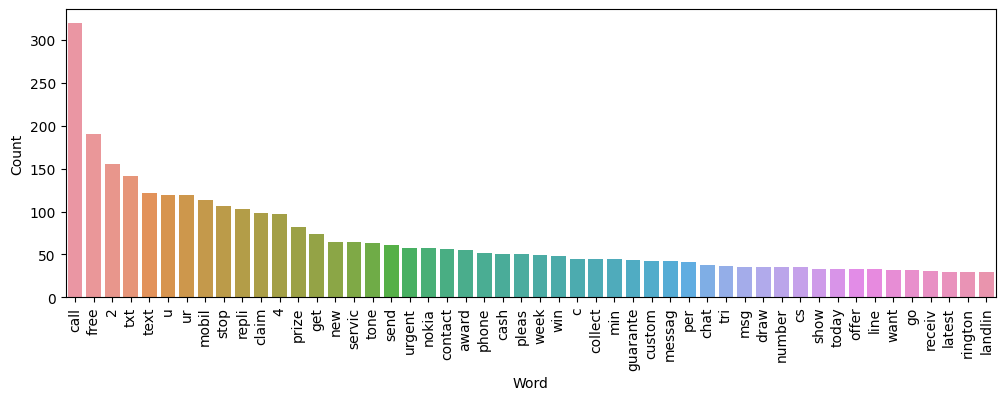

In [90]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0], pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
#plt.xsticks(rotation='vertical')
#plt.show()

from collections import Counter
counts = Counter(spam_corpus).most_common(50)
df_counts = pd.DataFrame(counts, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x='Word', y='Count')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)  # Adjust the bottom margin as needed
plt.show()


In [91]:
# now finding 50 top words in ham emails
ham_corpus = []
for msg in df[df['Type']==0]['Transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [92]:
len(ham_corpus)

35758

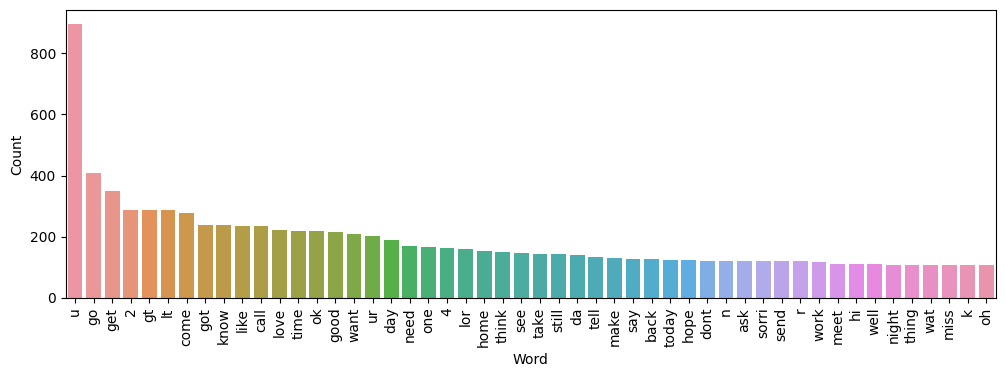

In [93]:
from collections import Counter
counts = Counter(ham_corpus).most_common(50)
df_counts = pd.DataFrame(counts, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x='Word', y='Count')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)  # Adjust the bottom margin as needed
plt.show()

<span style="font-size: 24px; color: blue; font-weight: bold;">4. Model Building</span>

In [94]:
# Text vectorization
# Using Bag of words
df.head()

,Type,text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar then Joking wif u oni,30,7,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
!pip install sklearn

In [96]:
# input = Transformde_text  ----> (not Numerical)
# Output = Type ------> (Numerical)
# first we need to convert Transformed_text into numbers by vectorizing using Bag of Words(most frequent words)
# second we give it as input to Naive Bayes and then find its accurace
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [97]:
X = cv.fit_transform(df['Transformed_text']).toarray()

In [98]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
X.shape

(5171, 6783)

In [100]:
y = df['Type'].values

In [101]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
y.shape

(5171,)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# we need matrix for y predic1
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [106]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [107]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8724637681159421
[[794 109]
 [ 23 109]]
0.5


In [108]:
# better performance then GNB
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9681159420289855
[[885  18]
 [ 15 117]]
0.8666666666666667


In [109]:
# better performance then MNB
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9690821256038648
[[902   1]
 [ 31 101]]
0.9901960784313726


In [110]:
# Note: we can use TF-IDF instead of CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer()      #builds TF-IDF object

In [111]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [112]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
X.shape

(5171, 6783)

In [114]:
y = df['Type'].values

In [115]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
y.shape

(5171,)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [119]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# we need matrix for y predic1
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [120]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [121]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
# No improvements

0.8705314009661835
[[795 108]
 [ 26 106]]
0.4953271028037383


In [122]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
# precission has improved significantly

0.9565217391304348
[[903   0]
 [ 45  87]]
1.0


In [123]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
# No changes in BNB

0.9690821256038648
[[902   1]
 [ 31 101]]
0.9901960784313726


In [124]:
#tfidf-----> MNB

##### Now we have options: either MNB  or BNB
##### we will go with MNB since Precission matters a lot in this case although accuracy is low.
##### but accuracy is not the measure here because the data is imbalanced

### for improvements of model, we better see if other ML models can perform better than MNB 

!pip install xgboost

In [125]:
# Other Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [126]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [127]:
# building a dictionary
# Keys ----> algorithm's name
# values -----> Objects
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb' : xgb
}

In [128]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [130]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9642512077294686, 0.9523809523809523)

In [131]:
#Running a loop on dictionary
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9642512077294686
Precision -  0.9523809523809523
For  KN
Accuracy -  0.8985507246376812
Precision -  1.0
For  NB
Accuracy -  0.9565217391304348
Precision -  1.0
For  DT
Accuracy -  0.9420289855072463
Precision -  0.839622641509434
For  LR
Accuracy -  0.9478260869565217
Precision -  0.9333333333333333
For  RF
Accuracy -  0.9632850241545894
Precision -  1.0
For  AdaBoost
Accuracy -  0.9652173913043478
Precision -  0.98
For  BgC
Accuracy -  0.957487922705314
Precision -  0.8728813559322034
For  ETC
Accuracy -  0.9710144927536232
Precision -  1.0
For  GBDT
Accuracy -  0.9458937198067633
Precision -  0.9418604651162791
For  xgb
Accuracy -  0.9652173913043478
Precision -  0.9363636363636364


In [132]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [133]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898551,1.000000
2,NB,0.956522,1.000000
5,RF,0.963285,1.000000
8,ETC,0.971014,1.000000
6,AdaBoost,0.965217,0.980000
0,SVC,0.964251,0.952381
9,GBDT,0.945894,0.941860
10,xgb,0.965217,0.936364
4,LR,0.947826,0.933333
7,BgC,0.957488,0.872881


In [134]:
# ETC, RF, NB and AdaBoost all have good Precision and Accuracy and it makes difficult model selection
# so we're going to try to improve some these models and then do the final selection
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [135]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.898551
1,NB,Accuracy,0.956522
2,RF,Accuracy,0.963285
3,ETC,Accuracy,0.971014
4,AdaBoost,Accuracy,0.965217
5,SVC,Accuracy,0.964251
6,GBDT,Accuracy,0.945894
7,xgb,Accuracy,0.965217
8,LR,Accuracy,0.947826
9,BgC,Accuracy,0.957488


C:\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


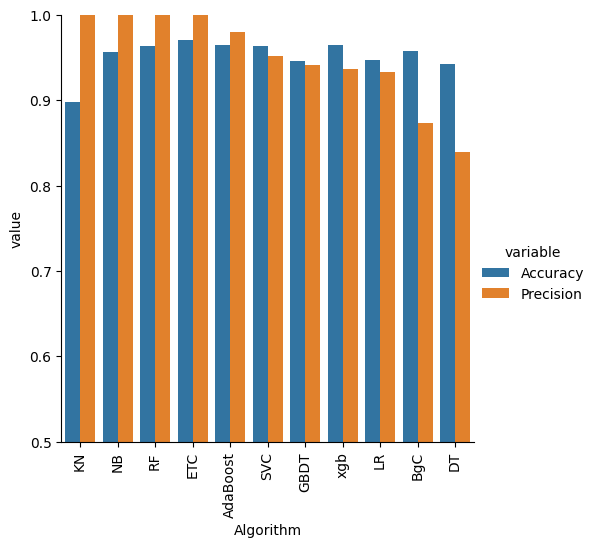

In [136]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [137]:
# Model Improvemet
# changing the max_features of TF-IDF vectorizer class
# max_features----> when vectorizing, the capacity that how many words can we vectorize


In [138]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3350)

In [139]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [140]:
X.shape

(5171, 3350)

In [141]:
y = df['Type'].values

In [142]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [145]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# we need matrix for y predic1
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [146]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [147]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8705314009661835
[[795 108]
 [ 26 106]]
0.4953271028037383


In [148]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9719806763285024
[[903   0]
 [ 29 103]]
1.0


In [149]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9806763285024155
[[902   1]
 [ 19 113]]
0.9912280701754386


In [150]:
# tfidf----> MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [151]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [152]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb' : xgb
}

In [153]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [154]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9671497584541063, 0.9537037037037037)

In [155]:
#Running a loop on dictionary
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9671497584541063
Precision -  0.9537037037037037
For  KN
Accuracy -  0.9082125603864735
Precision -  1.0
For  NB
Accuracy -  0.9719806763285024
Precision -  1.0
For  DT
Accuracy -  0.9304347826086956
Precision -  0.8191489361702128
For  LR
Accuracy -  0.9536231884057971
Precision -  0.9375
For  RF
Accuracy -  0.9690821256038648
Precision -  1.0
For  AdaBoost
Accuracy -  0.9642512077294686
Precision -  0.9797979797979798
For  BgC
Accuracy -  0.9594202898550724
Precision -  0.8688524590163934
For  ETC
Accuracy -  0.9768115942028985
Precision -  1.0
For  GBDT
Accuracy -  0.9497584541062802
Precision -  0.9545454545454546
For  xgb
Accuracy -  0.9671497584541063
Precision -  0.9537037037037037


In [156]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [157]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908213,1.000000
2,NB,0.971981,1.000000
5,RF,0.969082,1.000000
8,ETC,0.976812,1.000000
6,AdaBoost,0.964251,0.979798
9,GBDT,0.949758,0.954545
0,SVC,0.967150,0.953704
10,xgb,0.967150,0.953704
4,LR,0.953623,0.937500
7,BgC,0.959420,0.868852


In [158]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [159]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908213
1,NB,Accuracy,0.971981
2,RF,Accuracy,0.969082
3,ETC,Accuracy,0.976812
4,AdaBoost,Accuracy,0.964251
5,GBDT,Accuracy,0.949758
6,SVC,Accuracy,0.967150
7,xgb,Accuracy,0.967150
8,LR,Accuracy,0.953623
9,BgC,Accuracy,0.959420


C:\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


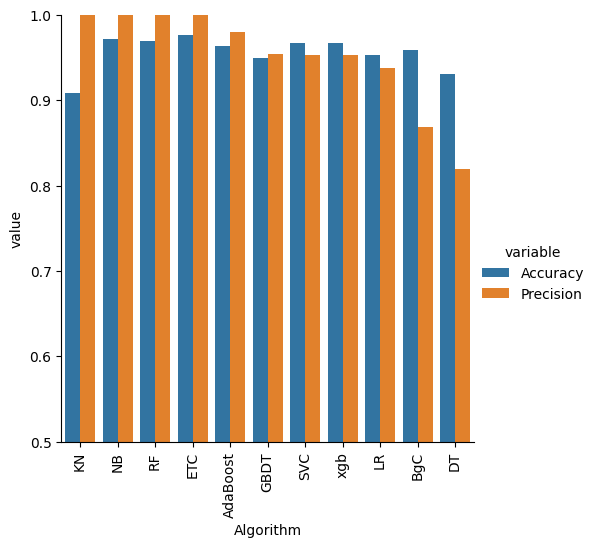

In [160]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### appending the new results with the old one

In [161]:
temp_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy_max_ft_3350': accuracy_scores, 'Precision_max_ft_3350': precision_scores}).sort_values('Precision_max_ft_3350', ascending=False)


In [162]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3350,Precision_max_ft_3350
0,KN,0.908213,1.000000,0.908213,1.000000
1,NB,0.971981,1.000000,0.971981,1.000000
2,RF,0.969082,1.000000,0.969082,1.000000
3,ETC,0.976812,1.000000,0.976812,1.000000
4,AdaBoost,0.964251,0.979798,0.964251,0.979798
5,GBDT,0.949758,0.954545,0.949758,0.954545
6,SVC,0.967150,0.953704,0.967150,0.953704
7,xgb,0.967150,0.953704,0.967150,0.953704
8,LR,0.953623,0.937500,0.953623,0.937500
9,BgC,0.959420,0.868852,0.959420,0.868852


# I choose NB

In [163]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))